# Importing Libraries



In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample

# Collecting the data | Merging the data

In [44]:
df1 = pd.read_csv('diabetes.csv') #PIMA INDIAN DIABETES DATASET
df2 = pd.read_csv('Dataset2.csv') #RTML DATASET

In [45]:
dataset=pd.concat([df1,df2], axis=0)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,50,1
1,1,85.0,66.0,29.0,0.0,26.6,31,0
2,8,183.0,64.0,0.0,0.0,23.3,32,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0
4,0,137.0,40.0,35.0,168.0,43.1,33,1


In [46]:
#dimensions of the data
dataset.shape

(877, 8)

In [47]:
    # Replacing 0 values with the mean of that column  
      
    # Replacing 0 values of Glucose  
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].median())  
      
    # Filling 0 values of Blood Pressure  
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].median())   
      
    # Replacing 0 values in BMI  
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())  
      
    # Replacing the missing values of Insulin and SkinThickness  
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mean())  
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())  
dataset.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.000000,85.785467,33.6,50,1
1,1,85.0,66.0,29.000000,85.785467,26.6,31,0
2,8,183.0,64.0,19.324173,85.785467,23.3,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,33,1


In [48]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,3.542759,119.792018,73.259863,24.325983,122.369007,31.437265,32.940707,0.331813
std,3.325844,32.181988,12.448991,10.680147,87.740173,7.437720,12.413763,0.471133
min,0.000000,44.000000,5.900000,2.900000,14.000000,2.612584,18.000000,0.000000
25%,1.000000,95.400000,66.000000,19.324173,85.785467,26.253440,23.000000,0.000000
50%,3.000000,114.000000,72.000000,19.324173,85.785467,31.200000,29.000000,0.000000
75%,6.000000,139.000000,81.000000,31.000000,139.365510,35.900000,41.000000,1.000000
max,17.000000,239.400000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


Outcome
0    586
1    291
Name: count, dtype: int64

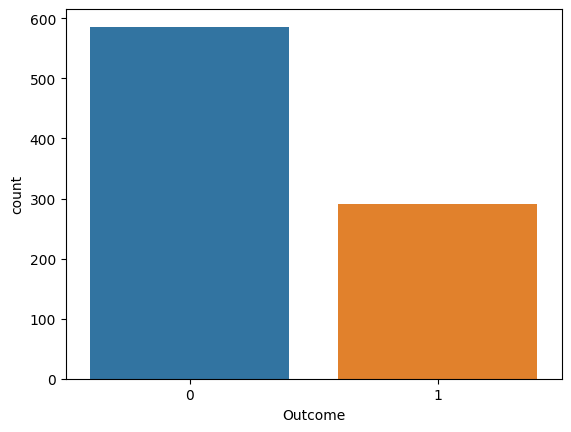

In [49]:
#calculating the binary outcome of our target variable i.e 0's and 1
sns.countplot(x='Outcome', data=dataset)
dataset['Outcome'].value_counts()

# Upsampling the dataset to address class imbalance


In [50]:
# Separate the majority and minority classes
majority_class = dataset[dataset['Outcome'] == 0]
minority_class = dataset[dataset['Outcome'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of samples in majority class
                              random_state=42)  # Set a random state for reproducibility

# Combine the upsampled minority class with the majority class
upsampled_dataset = pd.concat([majority_class, minority_upsampled])

# Check the class distribution
upsampled_dataset['Outcome'].value_counts()

Outcome
0    586
1    586
Name: count, dtype: int64

In [51]:
upsampled_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
1,1,85.0,66.0,29.000000,85.785467,26.6,31,0
3,1,89.0,66.0,23.000000,94.000000,28.1,21,0
5,5,116.0,74.0,19.324173,85.785467,25.6,30,0
7,10,115.0,72.0,19.324173,85.785467,35.3,29,0
10,4,110.0,92.0,19.324173,85.785467,37.6,30,0


Outcome
0    586
1    586
Name: count, dtype: int64

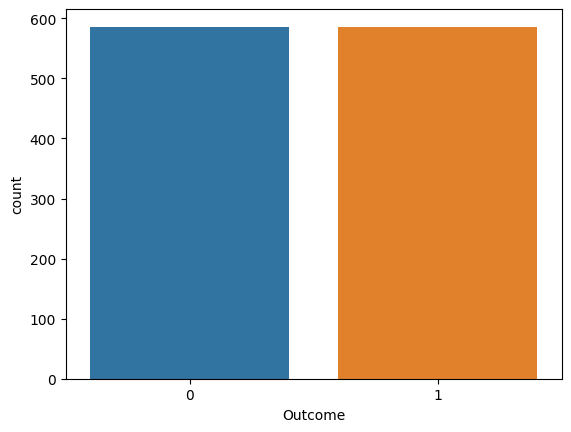

In [52]:
#calculating the binary outcome of our target variable i.e 0's and 1
sns.countplot(x='Outcome', data=upsampled_dataset)
upsampled_dataset['Outcome'].value_counts()

# Correlation Heatmap of the features with the Outcome

<Axes: >

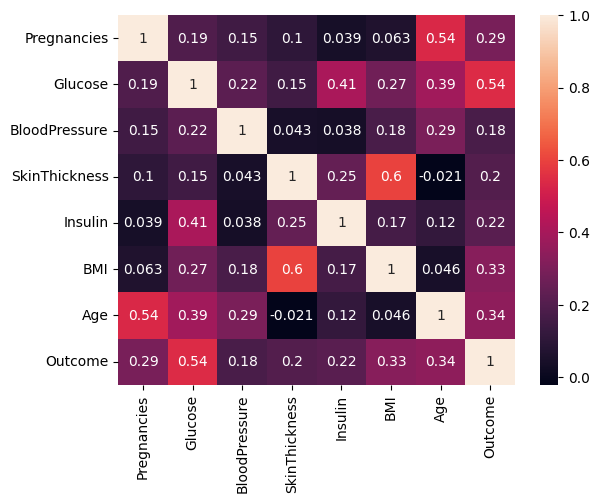

In [53]:
corr_mat = upsampled_dataset.corr()
sns.heatmap(corr_mat, annot=True)

According to the heatmap, we can see correlation between glucose and Outcome is 54%. Hence Outcome has a significant dependance on glucose values

In [54]:
#Feature matrix - Taking all our independent columns into single array 
#and dependent values into another array

x = upsampled_dataset.drop(["Outcome"], axis=1).values  #Independent matrix
y=dataset.iloc[:,-1].values  #This converts the selected data into a NumPy array. The .values attribute returns the underlying data as a NumPy array.

x.shape

(1172, 7)

# EDA

Text(0.5, 1.0, 'Glucose')

<Figure size 1600x600 with 0 Axes>

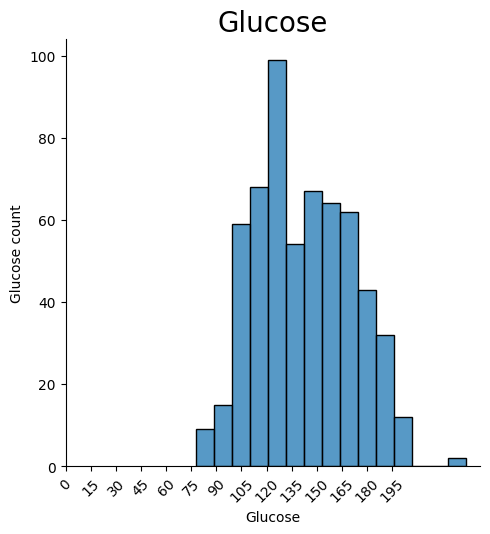

In [55]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.displot(upsampled_dataset["Glucose"][upsampled_dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

<Figure size 1600x600 with 0 Axes>

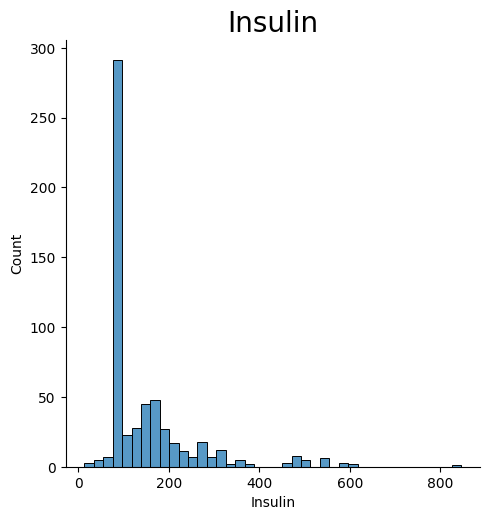

In [56]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.displot(upsampled_dataset["Insulin"][upsampled_dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

<Figure size 1600x600 with 0 Axes>

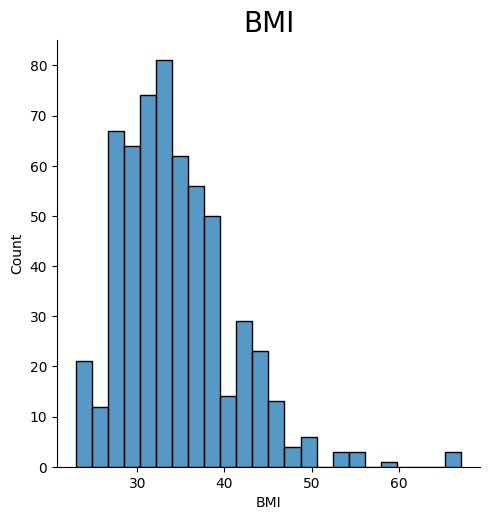

In [57]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.displot(upsampled_dataset["BMI"][upsampled_dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'Age')

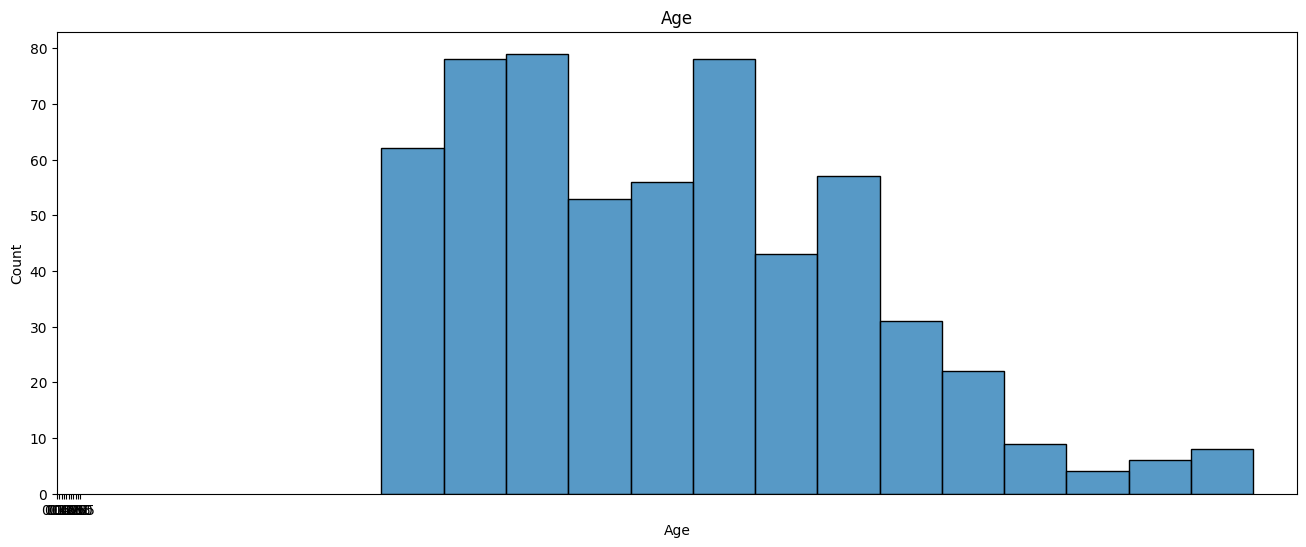

In [58]:
#Age for diabetic
fig = plt.figure(figsize=(16, 6))
ax = sns.histplot(upsampled_dataset["Age"][upsampled_dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1, 12)])
plt.title("Age")

Text(0.5, 1.0, 'BloodPressure')

<Figure size 1600x600 with 0 Axes>

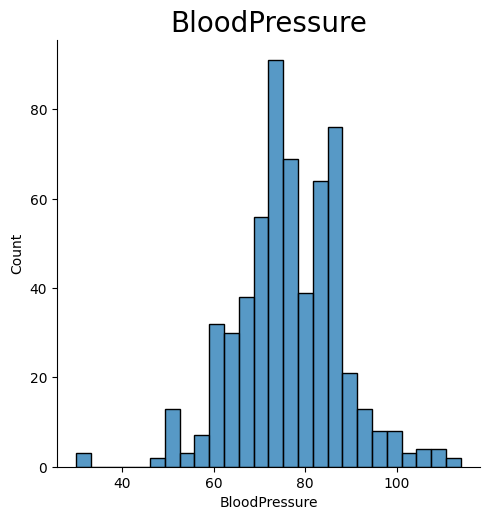

In [59]:
#BloodPressure for diabetic
fig = plt.figure(figsize =(16,6))

sns.displot(upsampled_dataset["BloodPressure"][upsampled_dataset["Outcome"]==1])
plt.xticks()
plt.title("BloodPressure",fontsize = 20)

Text(0.5, 1.0, 'Pregnancies')

<Figure size 1600x600 with 0 Axes>

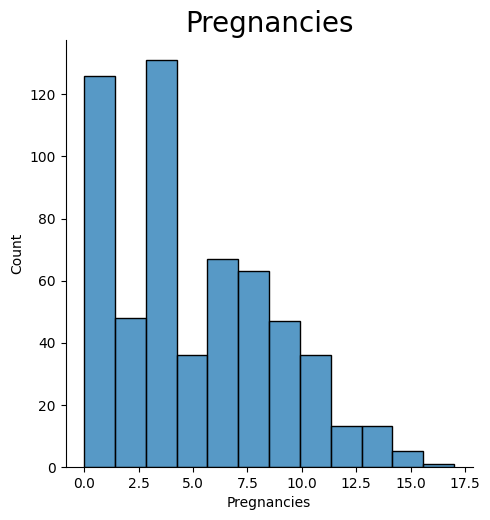

In [60]:
#Pregnancies for diabetic
fig = plt.figure(figsize =(16,6))

sns.displot(upsampled_dataset["Pregnancies"][upsampled_dataset["Outcome"]==1])
plt.xticks()
plt.title("Pregnancies",fontsize = 20)

# Test Train Split

In [61]:
#Removing unnessary columns
x = upsampled_dataset.drop(["Outcome"],axis = 1)
y = upsampled_dataset["Outcome"]

In [62]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
print("The size of the training dataset: ", x_train.size)  
print("The size of the testing dataset: ", x_test.size)  
#test_size 0.3 means for testing data 30% and training data 70%

The size of the training dataset:  5740
The size of the testing dataset:  2464


In [63]:
x_train.shape #70% of original dataset after removing unnecceasry data

(820, 7)

In [64]:
x_test.shape #30% of original dataset after removing unnecceasry data

(352, 7)

## Feature Scaling

In [65]:
#Feature Scaling - To standardize the independent features present in the data in a fixed range.
#If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller
#values as the lower values, regardless of the unit of the values. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building - KNN

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': [3, 9, 5, 10, 15, 20, 25, 30]}

# Create the KNN classifier
knn = KNeighborsClassifier(metric='minkowski')

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the data to perform grid search
grid_search.fit(x_train, y_train)

# Print the best parameter and its corresponding score
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])


Best n_neighbors: 10


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =10, metric = 'minkowski') 

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [68]:
#Predicting the data
knn_y_pred = knn.predict(x_test)

In [69]:
knn_y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,

<Axes: >

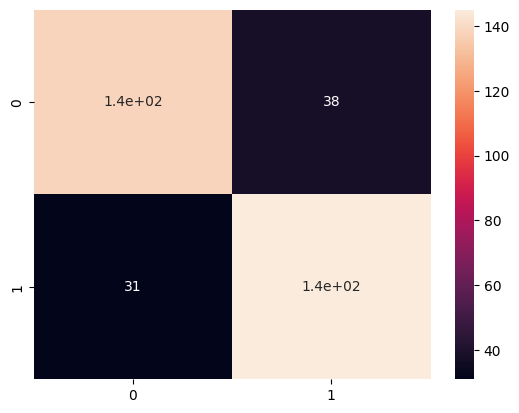

In [70]:

# Confusion matrix - To check how many are correct or wrong 
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

The above heatmap says 0,0 means true negative and 1,1 means true positive and 0,1 means even person is negative but showing result positive and 1,0 means person is positive but shows negative


In [71]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))
print("Accuracy:",sum(knn_y_pred ==y_test)/len(knn_y_pred))

Correct: 283
Incorrect :  69
Accuracy: 0.8039772727272727


In [72]:
#Verfying accuracy using inbuilt methods
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.8039772727272727

# Simple Vector Machine

In [73]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [74]:
svc_y_pred = svc.predict(x_test)

[[140  36]
 [ 51 125]]


<Axes: >

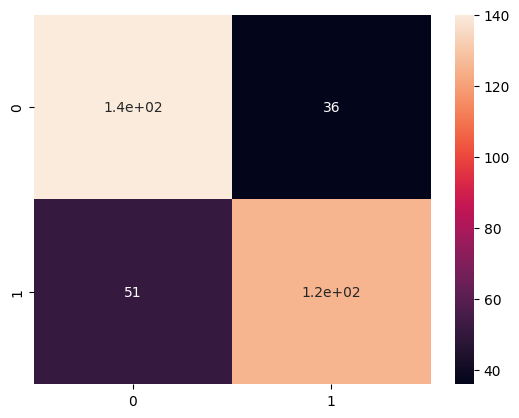

In [75]:

svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)
sns.heatmap(svc_cm, annot=True)

In [76]:
print("Correct:",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy:",sum(svc_y_pred ==y_test)/len(knn_y_pred))

Correct: 265
Incorrect :  87
Accuracy: 0.7528409090909091


# Naive Bias

In [77]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [78]:
nb_y_pred =nb_classifier.predict(x_test)

[[140  60]
 [ 36 116]]


<Axes: >

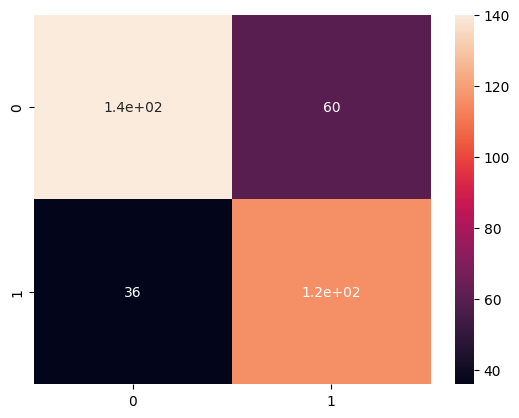

In [79]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)
sns.heatmap(nb_cm, annot=True)

In [80]:
print("Correct:",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy:",sum(nb_y_pred ==y_test)/len(nb_y_pred))

Correct: 256
Incorrect :  96
Accuracy: 0.7272727272727273


# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)


RandomForestClassifier(random_state=42)


<Axes: >

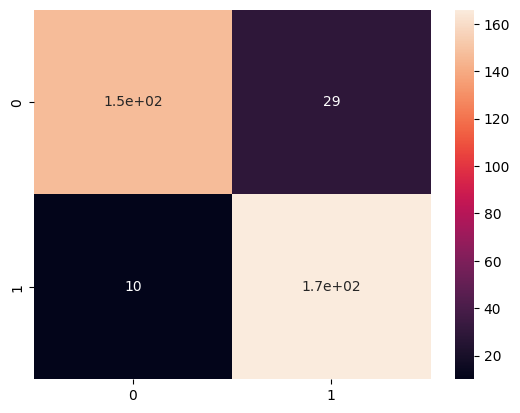

In [82]:
rf_cm = confusion_matrix(y_test,y_pred)
print(rf_classifier)
sns.heatmap(rf_cm, annot=True)

In [83]:
print("Correct:",sum(y_pred == y_test))
print("Incorrect : ",sum(y_pred != y_test))
print("Accuracy:",sum(y_pred ==y_test)/len(y_pred))

Correct: 313
Incorrect :  39
Accuracy: 0.8892045454545454


## Saving the classifer

In [84]:
import pickle
pickle.dump(rf_classifier, open('classifier.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb')) #standard scaler